In [3]:
%matplotlib inline
import io
import bson
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from skimage.data import imread

In [4]:
products = []
for product in bson.decode_file_iter(open('../data/train_example.bson', 'rb')):
    product_id = product['_id']
    category_id = product['category_id'] # This won't be in Test data
    for product_picture in product['imgs']:
        picture = imread(io.BytesIO(product_picture['picture']))
        products.append({
            '_id': product_id,
            'category_id': category_id,
            'img': picture
        })

In [5]:
products = pd.DataFrame.from_records(products)
names = pd.read_csv('../data/category_names.csv')
df = pd.merge(left=products, right=names, on='category_id')
df.drop('img', axis=1).head()

,_id,category_id,category_level1,category_level2,category_level3
0,0,1000010653,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE TELEPHONE - BUMPER TELEPHONE
1,1,1000010653,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE TELEPHONE - BUMPER TELEPHONE
2,5,1000010653,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE TELEPHONE - BUMPER TELEPHONE
3,11,1000010653,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE TELEPHONE - BUMPER TELEPHONE
4,16,1000010653,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE TELEPHONE - BUMPER TELEPHONE


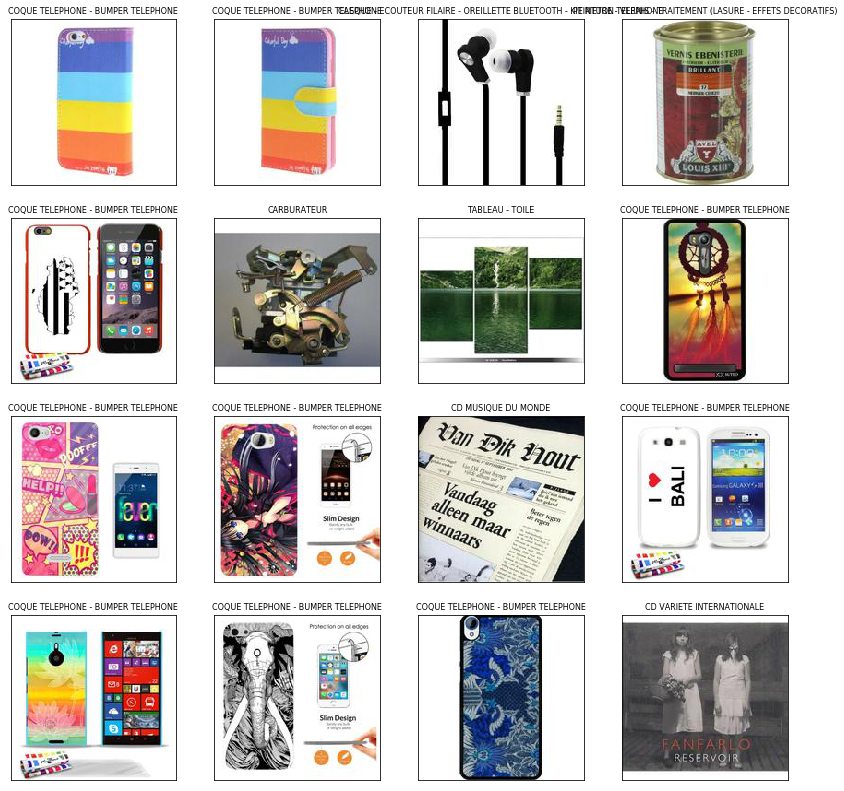

In [8]:
fig, ax = plt.subplots(4, 4, figsize=(14, 14), squeeze=True)
for row, ax in zip(df.sample(ax.size).itertuples(), ax.ravel()):
    ax.imshow(row.img)
    ax.set_title(row.category_level3, fontdict={'fontsize': 8})
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)